In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

minlat = 36
minlon = -160

dirread = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'

def getclosest_ij(lats,lons,latpt,lonpt):     
    """Function to find the index of the closest point to a certain lon/lat value."""
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2                 # find squared distance of every point on grid
    minindex_flattened = dist_sq.argmin()                       # 1D index of minimum dist_sq element
    return np.unravel_index(minindex_flattened, lats.shape)     # Get 2D index for latvals and lonvals arrays from 1D index

initialgrid_mask = dirread+'ORCA0083-N06_20070105d05U.nc'
mask = xr.open_dataset(initialgrid_mask, decode_times=False)
Lat, Lon, Depth = mask.variables['nav_lat'], mask.variables['nav_lon'], mask.variables['depthu']
latvals = Lat[:]; lonvals = Lon[:] # extract lat/lon values to numpy arrays

iy, ix = getclosest_ij(latvals, lonvals, minlat, minlon)
print(iy)
print(ix)

1959
1524


[[2.57529080e-01 2.54975379e-01 2.51617998e-01 2.47241914e-01
  2.41595834e-01 2.34391257e-01 2.25309446e-01 2.14017853e-01
  2.00199455e-01 1.83607385e-01 1.64161369e-01 1.42103255e-01
  1.18188456e-01 9.37864259e-02 7.06769675e-02 5.05123250e-02
  3.42798531e-02 2.21383013e-02 1.36284586e-02 8.00147280e-03
  4.47713910e-03 2.38063373e-03 1.19882077e-03 5.39983681e-04
  1.67690159e-04 3.32858908e-05 2.60702359e-06 8.13526668e-08
  2.02457020e-08 1.00279909e-08 5.85203885e-09 3.26285488e-09
  1.57711699e-09 6.17364937e-10 1.81553772e-10 3.46299552e-11
  2.37505176e-12 6.71185731e-15 3.34522084e-16 1.00022587e-16
  2.44795946e-17 4.20815067e-18 4.37244880e-19 1.98280395e-20
  5.74627930e-23 1.23181763e-26 1.35423661e-27 1.07233071e-28
  5.09413511e-30 1.54807269e-31 2.93127854e-32            nan
             nan            nan            nan            nan
             nan            nan            nan            nan
             nan            nan            nan            nan
        

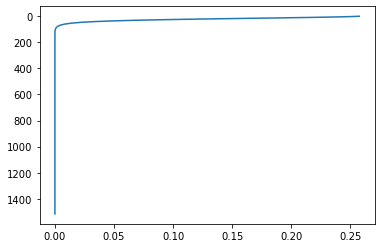

In [18]:
pfile = xr.open_dataset('/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA_BGC/ORCA0083-N006/means/ORCA0083-N06_20070105d05D.nc')
tpp,nd_phy,d_phy = pfile.variables['TPP3'],pfile.variables['PRN'], pfile.variables['PRD']
tpp1 = tpp[:,:,iy,ix].data 
tot_phy = nd_phy[:,iy,ix].data + d_phy[:,iy,ix].data 

print(tpp1)
#print(Depth)
plt.plot(tpp1.T,Depth)
plt.gca().invert_yaxis()

In [21]:
print(tot_phy)

# plt.plot(tot_phy.T,Depth)
# plt.gca().invert_yaxis()

[5.0461736]
